In [176]:
import pandas as pd
import numpy as np
import time
import datetime
pd.set_option('display.max_rows', 1000)
from scipy.stats import truncnorm
from scipy import signal
import matplotlib.pyplot as plt


There are 3 sensors in total. Two old sensors and the Aeotect Multisensor 6 
* sensorA: multipurpose sensor
 * acceleration
 * status (door)
 * temperature 
* sensorB: motion sensor
 * motion
* sensorC: multisensor 
 * motion
 * temperature
 * humidity
 * illuminance
 

In [109]:

sensorA = pd.read_csv("data_multipurpose_sensor.csv")
sensorB = pd.read_csv("data_motion_sensor.csv")
sensorC = pd.read_csv("data_multisensor.csv")

In [110]:
sensorA 

,name,time,value
0,acceleration,2019-10-20 3:14:48.384 PM,inactive
1,acceleration,2019-10-20 3:14:38.361 PM,active
2,status,2019-10-20 3:14:35.468 PM,closed
3,acceleration,2019-10-20 3:14:15.055 PM,inactive
4,acceleration,2019-10-20 3:13:54.990 PM,active
5,status,2019-10-20 3:13:26.800 PM,open
6,acceleration,2019-10-20 3:13:24.898 PM,inactive
7,acceleration,2019-10-20 3:13:14.869 PM,active
8,temperature,2019-10-20 2:54:17.980 PM,67
9,status,2019-10-20 2:51:26.471 PM,closed


In [111]:
sensorB


,name,time,value
0,motion,2019-10-20 3:36:20.622 PM,inactive
1,motion,2019-10-20 3:36:10.050 PM,active
2,motion,2019-10-20 3:35:50.504 PM,inactive
3,motion,2019-10-20 3:35:39.835 PM,active
4,motion,2019-10-20 3:32:35.173 PM,inactive
5,motion,2019-10-20 3:32:24.575 PM,active
6,motion,2019-10-20 3:30:47.845 PM,inactive
7,motion,2019-10-20 3:30:36.080 PM,active
8,motion,2019-10-20 3:30:11.488 PM,inactive
9,motion,2019-10-20 3:29:56.308 PM,active


In [112]:
sensorC

,name,time,value
0,humidity,2019-10-25 9:11:07.941 AM,59
1,temperature,2019-10-25 9:11:03.351 AM,69.7
2,humidity,2019-10-25 8:55:06.040 AM,58
3,activity,2019-10-25 8:55:03.587 AM,online
4,temperature,2019-10-25 8:55:01.611 AM,69.6
5,ping,2019-10-25 8:05:37.277 AM,ping command was sent to Aeon Multisensor 6
6,ping,2019-10-25 7:03:37.279 AM,ping command was sent to Aeon Multisensor 6
7,ping,2019-10-25 6:17:37.273 AM,ping command was sent to Aeon Multisensor 6
8,ping,2019-10-25 5:39:37.271 AM,ping command was sent to Aeon Multisensor 6
9,ping,2019-10-25 5:05:37.267 AM,ping command was sent to Aeon Multisensor 6


In [113]:
sensorA["name"] = sensorA["name"] + "_sensorA"

In [114]:
sensorA["name"]

0       acceleration_sensorA
1       acceleration_sensorA
2             status_sensorA
3       acceleration_sensorA
4       acceleration_sensorA
5             status_sensorA
6       acceleration_sensorA
7       acceleration_sensorA
8        temperature_sensorA
9             status_sensorA
10      acceleration_sensorA
11            status_sensorA
12      acceleration_sensorA
13      acceleration_sensorA
14            status_sensorA
15            status_sensorA
16            status_sensorA
17      acceleration_sensorA
18            status_sensorA
19      acceleration_sensorA
20            status_sensorA
21            status_sensorA
22            status_sensorA
23      acceleration_sensorA
24            status_sensorA
25      acceleration_sensorA
26            status_sensorA
27      acceleration_sensorA
28            status_sensorA
29      acceleration_sensorA
30            status_sensorA
31            status_sensorA
32      acceleration_sensorA
33      acceleration_sensorA
34            

In [115]:
sensorA

,name,time,value
0,acceleration_sensorA,2019-10-20 3:14:48.384 PM,inactive
1,acceleration_sensorA,2019-10-20 3:14:38.361 PM,active
2,status_sensorA,2019-10-20 3:14:35.468 PM,closed
3,acceleration_sensorA,2019-10-20 3:14:15.055 PM,inactive
4,acceleration_sensorA,2019-10-20 3:13:54.990 PM,active
5,status_sensorA,2019-10-20 3:13:26.800 PM,open
6,acceleration_sensorA,2019-10-20 3:13:24.898 PM,inactive
7,acceleration_sensorA,2019-10-20 3:13:14.869 PM,active
8,temperature_sensorA,2019-10-20 2:54:17.980 PM,67
9,status_sensorA,2019-10-20 2:51:26.471 PM,closed


In [116]:
sensorB["name"] = sensorB["name"] + "_sensorB"
sensorC["name"] = sensorC["name"] + "_sensorC"

combine the three datasets 

In [117]:
data = pd.concat([sensorA, sensorB, sensorC])

In [118]:
data

,name,time,value
0,acceleration_sensorA,2019-10-20 3:14:48.384 PM,inactive
1,acceleration_sensorA,2019-10-20 3:14:38.361 PM,active
2,status_sensorA,2019-10-20 3:14:35.468 PM,closed
3,acceleration_sensorA,2019-10-20 3:14:15.055 PM,inactive
4,acceleration_sensorA,2019-10-20 3:13:54.990 PM,active
5,status_sensorA,2019-10-20 3:13:26.800 PM,open
6,acceleration_sensorA,2019-10-20 3:13:24.898 PM,inactive
7,acceleration_sensorA,2019-10-20 3:13:14.869 PM,active
8,temperature_sensorA,2019-10-20 2:54:17.980 PM,67
9,status_sensorA,2019-10-20 2:51:26.471 PM,closed


rank the data by time, with ascending order 
first conver the time to timestamp

In [119]:
data.iloc[2323]

name                motion_sensorB
time     2019-10-25 9:08:08.220 AM
value                     inactive
Name: 199, dtype: object

In [120]:

timestamp_list = []
for i in range(data.shape[0]):
    #epoch = int(time.mktime(datetime.datetime.strptime(data["time"].iloc[i],"%Y-%m-%d %I:%M:%S.%f %p")))
    timestamp = datetime.datetime.strptime(data["time"].iloc[i],"%Y-%m-%d %I:%M:%S.%f %p").timestamp()
    timestamp_list.append(timestamp)
timestamp_list

[1571598888.384,
 1571598878.361,
 1571598875.468,
 1571598855.055,
 1571598834.99,
 1571598806.8,
 1571598804.898,
 1571598794.869,
 1571597657.98,
 1571597486.471,
 1571597471.895,
 1571597462.715,
 1571597461.87,
 1571597358.887,
 1571597350.116,
 1571597345.811,
 1571597339.231,
 1571597338.834,
 1571597334.981,
 1571596969.735,
 1571596966.242,
 1571596962.185,
 1571596959.76,
 1571596959.725,
 1571596948.376,
 1571596761.62,
 1571596755.507,
 1571596751.605,
 1571596751.441,
 1571596723.43,
 1571596710.711,
 1571596705.511,
 1571596703.373,
 1571594911.235,
 1571594904.95,
 1571594901.2,
 1571594901.131,
 1571594139.71,
 1571594132.981,
 1571594129.687,
 1571594129.532,
 1571594059.27,
 1571594049.57,
 1571594049.253,
 1571594044.471,
 1571591057.228,
 1571591049.105,
 1571591047.173,
 1571591028.209,
 1571591018.193,
 1571591018.0,
 1571590981.76,
 1571590976.99,
 1571590971.723,
 1571590971.691,
 1571590913.32,
 1571590904.818,
 1571590903.332,
 1571590900.966,
 1571590801.951,

In [121]:
data["timestamp"] = timestamp_list

In [122]:
data = data.sort_values(by = ["timestamp"], ascending = True)
data = data.reset_index(drop = True)

In [131]:
data = data.iloc[340:]

In [132]:
data

,name,time,value,timestamp
340,motion_sensorB,2019-10-20 12:58:31.340 PM,inactive,1.571591e+09
341,motion_sensorB,2019-10-20 12:58:31.340 PM,inactive,1.571591e+09
342,status_sensorA,2019-10-20 12:58:44.661 PM,closed,1.571591e+09
343,acceleration_sensorA,2019-10-20 12:58:48.510 PM,inactive,1.571591e+09
344,motion_sensorC,2019-10-20 12:59:00.561 PM,inactive,1.571591e+09
345,motion_sensorC,2019-10-20 12:59:00.561 PM,inactive,1.571591e+09
346,motion_sensorB,2019-10-20 12:59:16.390 PM,active,1.571591e+09
347,motion_sensorB,2019-10-20 12:59:16.390 PM,active,1.571591e+09
348,motion_sensorC,2019-10-20 12:59:16.802 PM,active,1.571591e+09
349,motion_sensorC,2019-10-20 12:59:16.802 PM,active,1.571591e+09


hard code to select data in this afternoon

In [133]:
data.name.unique().tolist()

['motion_sensorB',
 'status_sensorA',
 'acceleration_sensorA',
 'motion_sensorC',
 'temperature_sensorC',
 'humidity_sensorC',
 'illuminance_sensorC',
 'threeAxis_sensorA',
 'contact_sensorA',
 'tamper_sensorC',
 'temperature_sensorA',
 'temperature_sensorB',
 'ping_sensorA',
 'activity_sensorA',
 'battery_sensorB',
 'ping_sensorC',
 'activity_sensorC']

In [134]:
column_list = data.name.unique().tolist()
try: 
    column_list.remove("tamper_sensorC")
except ValueError:
    print("")

try: 
    column_list.remove("battery_sensorA")
except ValueError:
     print("")


try: 
    column_list.remove("threeAxis_sensorA")
except ValueError:
     print("")
    

try: 
    column_list.remove("contact_sensorA")
except ValueError:
     print("")
        
try: 
    column_list.remove("ping_sensorA")
except ValueError:
     print("")
    
try: 
    column_list.remove("activity_sensorA")
except ValueError:
     print("")
        
try: 
    column_list.remove("battery_sensorB")
except ValueError:
     print("")

try: 
    column_list.remove("activity_sensorC")
except ValueError:
     print("")

try: 
    column_list.remove("ping_sensorC")
except ValueError:
     print("")        

# The transformed dataset

In [135]:
# initialize the values
df = pd.DataFrame(columns = ['temperature_sensorA', 'acceleration_sensorA', 'status_sensorA', 'motion_sensorB', 'motion_sensorC', 'temperature_sensorC', 'humidity_sensorC', 'illuminance_sensorC', 'time'] )
previous_dict = {'temperature_sensorB' : 70, 'temperature_sensorA' : 70, 'acceleration_sensorA' : "inactive", 'status_sensorA' : "closed", 'motion_sensorB':"inactive", 'motion_sensorC' : "inactive", 'temperature_sensorC' : 70, 'humidity_sensorC' : 62, 'illuminance_sensorC' : 4}
for index, row in data.iterrows():
    time =  row["time"]
    name = row["name"]
    value = row["value"]
    if (name in column_list):
        for item in column_list:
            df.at[index, item] = previous_dict[item]
        #df[name].iloc[index] = 
        df.at[index, name] = value
        previous_dict[name] = value
        df.at[index, "time"] = time
df

,temperature_sensorA,acceleration_sensorA,status_sensorA,motion_sensorB,motion_sensorC,temperature_sensorC,humidity_sensorC,illuminance_sensorC,time,temperature_sensorB
340,70,inactive,closed,inactive,inactive,70,62,4,2019-10-20 12:58:31.340 PM,70.0
341,70,inactive,closed,inactive,inactive,70,62,4,2019-10-20 12:58:31.340 PM,70.0
342,70,inactive,closed,inactive,inactive,70,62,4,2019-10-20 12:58:44.661 PM,70.0
343,70,inactive,closed,inactive,inactive,70,62,4,2019-10-20 12:58:48.510 PM,70.0
344,70,inactive,closed,inactive,inactive,70,62,4,2019-10-20 12:59:00.561 PM,70.0
345,70,inactive,closed,inactive,inactive,70,62,4,2019-10-20 12:59:00.561 PM,70.0
346,70,inactive,closed,active,inactive,70,62,4,2019-10-20 12:59:16.390 PM,70.0
347,70,inactive,closed,active,inactive,70,62,4,2019-10-20 12:59:16.390 PM,70.0
348,70,inactive,closed,active,active,70,62,4,2019-10-20 12:59:16.802 PM,70.0
349,70,inactive,closed,active,active,70,62,4,2019-10-20 12:59:16.802 PM,70.0


In [138]:
df.to_csv("normal_multisensor.csv")

In [137]:
def transform_data():
    sensorA = pd.read_csv("data_multipurpose_sensor.csv")
    sensorB = pd.read_csv("data_motion_sensor.csv")
    sensorC = pd.read_csv("data_multisensor.csv")
    sensorA["name"] = sensorA["name"] + "_sensorA"
    sensorB["name"] = sensorB["name"] + "_sensorB"
    sensorC["name"] = sensorC["name"] + "_sensorC"
    #combine the data
    data = pd.concat([sensorA, sensorB, sensorC])
    timestamp_list = []
    for i in range(data.shape[0]):
        #epoch = int(time.mktime(datetime.datetime.strptime(data["time"].iloc[i],"%Y-%m-%d %I:%M:%S.%f %p")))
        timestamp = datetime.datetime.strptime(data["time"].iloc[i],"%Y-%m-%d %I:%M:%S.%f %p").timestamp()
        timestamp_list.append(timestamp)
    data["timestamp"] = timestamp_list
    data = data.sort_values(by = ["timestamp"], ascending = True)
    data = data.reset_index(drop = True)
    data = data.iloc[340:]
    column_list = data.name.unique().tolist()
    column_list.remove("tamper_sensorC")
    column_list.remove("battery_sensorA")
    df = pd.DataFrame(columns = ['temperature_sensorA', 'acceleration_sensorA', 'status_sensorA', 'motion_sensorB', 'motion_sensorC', 'temperature_sensorC', 'humidity_sensorC', 'illuminance_sensorC', 'time'] )
    previous_dict = {'temperature_sensorA' : 80, 'acceleration_sensorA' : "inactive", 'status_sensorA' : "closed", 'motion_sensorB':"inactive", 'motion_sensorC' : "inactive", 'temperature_sensorC' : 72.5, 'humidity_sensorC' : 62, 'illuminance_sensorC' : 4}
    for index, row in data.iterrows():
        time =  row["time"]
        name = row["name"]
        value = row["value"]
        if (name in column_list):
            for item in column_list:
                df.at[index, item] = previous_dict[item]
            #df[name].iloc[index] = 
            df.at[index, name] = value
            previous_dict[name] = value
            df.at[index, "time"] = time


In [139]:
df.shape[0]

3757

## Simulate a set of temperatures for a potential attacker device.  The mean and variance in the simulated data are similar while the frequency and interval of temperature changes are different, since the attcker device does not know what's happeing in the room. 

In [149]:
simulated_temp = []
for i in range(df.shape[0]):
    temp = int((truncnorm((65 - 75) / 2, (80 - 75) / 2, loc=75, scale=2).rvs()))
    simulated_temp.append(temp)
    

In [158]:
simulated_temp

[73,
 76,
 70,
 73,
 75,
 77,
 74,
 77,
 73,
 76,
 74,
 74,
 75,
 76,
 73,
 78,
 75,
 70,
 73,
 78,
 78,
 76,
 77,
 75,
 73,
 73,
 72,
 75,
 77,
 76,
 69,
 76,
 72,
 75,
 75,
 76,
 76,
 74,
 74,
 76,
 77,
 74,
 76,
 75,
 73,
 76,
 77,
 75,
 74,
 76,
 72,
 73,
 73,
 73,
 70,
 74,
 74,
 73,
 72,
 76,
 73,
 74,
 72,
 75,
 73,
 70,
 72,
 74,
 76,
 74,
 75,
 74,
 73,
 77,
 76,
 77,
 76,
 77,
 76,
 76,
 76,
 73,
 76,
 73,
 76,
 73,
 78,
 77,
 75,
 74,
 74,
 74,
 73,
 74,
 74,
 75,
 76,
 76,
 75,
 74,
 74,
 75,
 75,
 76,
 72,
 75,
 73,
 75,
 76,
 73,
 76,
 75,
 72,
 77,
 75,
 77,
 70,
 72,
 71,
 74,
 73,
 73,
 72,
 74,
 75,
 73,
 77,
 73,
 79,
 72,
 77,
 76,
 74,
 73,
 72,
 76,
 75,
 75,
 75,
 72,
 75,
 75,
 70,
 72,
 76,
 76,
 78,
 73,
 75,
 75,
 78,
 76,
 75,
 74,
 74,
 74,
 75,
 78,
 75,
 76,
 74,
 74,
 76,
 75,
 74,
 75,
 73,
 74,
 71,
 73,
 73,
 75,
 76,
 77,
 76,
 72,
 77,
 72,
 77,
 73,
 74,
 75,
 75,
 75,
 76,
 78,
 74,
 74,
 73,
 75,
 71,
 75,
 76,
 72,
 76,
 73,
 77,
 74,
 75,
 75,


## compare the simulated temperature with the tempreature recored by the sensor 

In [162]:
df["temperature_sensorA"].astype(int).to_numpy()

array([70, 70, 70, ..., 62, 62, 62])

 ## measure the cross correlation 

In [163]:
signal.correlate(simulated_temp, df["temperature_sensorA"].astype(int).to_numpy(), mode='same') 

array([9155226, 9160079, 9165166, ..., 9419222, 9414133, 9409090])

In [165]:
signal.correlate(df["temperature_sensorB"].astype(int).to_numpy(), df["temperature_sensorA"].astype(int).to_numpy(), mode='same') 

array([8305044, 8309471, 8313897, ..., 8262129, 8257715, 8253299])

In [170]:
signal.correlate(df["temperature_sensorC"].astype(float).to_numpy(), df["temperature_sensorA"].astype(int).to_numpy(), mode='same').tolist()

[8980756.599999996,
 8985664.299999995,
 8990571.199999994,
 8995484.099999998,
 9000398.499999996,
 9005318.999999998,
 9010239.499999996,
 9015159.899999997,
 9020080.199999996,
 9024999.799999995,
 9029918.999999996,
 9034837.899999997,
 9039756.399999997,
 9044674.899999997,
 9049593.299999993,
 9054511.599999996,
 9059436.099999994,
 9064360.299999997,
 9069284.999999994,
 9074209.599999998,
 9079140.599999996,
 9084071.499999998,
 9089002.199999997,
 9093932.699999996,
 9098862.899999999,
 9103793.099999996,
 9108723.299999995,
 9113653.499999994,
 9118583.599999996,
 9123513.699999997,
 9128449.699999996,
 9133385.599999996,
 9138321.399999997,
 9143257.199999997,
 9148192.299999997,
 9153125.599999996,
 9158065.099999994,
 9163004.799999995,
 9167944.599999996,
 9172884.599999996,
 9177818.399999997,
 9182752.299999995,
 9187686.799999995,
 9192614.799999997,
 9197544.099999996,
 9202466.999999996,
 9207389.899999997,
 9212318.899999997,
 9217247.799999995,
 9222176.399999997,


In [ ]:
pd.read_csv("data_multipurpose_sensor.csv")

#  time lagged cross correlation 
### TLCC (time lagged cross correlation) is measured by incrementally shifting one time series and repeatedly calculating the correlation between two signals.

In [172]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [227]:
def plot_offset_graph(d1, d2):
    max_lag = 150
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(max_lag),int(max_lag+1))]
    offset = np.ceil(len(rs)/2)-np.argmax(rs)
    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
    ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
    plt.legend()
    plt.show()
    return offset, max(rs) #return lag with highest correlation


## time series data on temperature from two sensors showed a small offset 

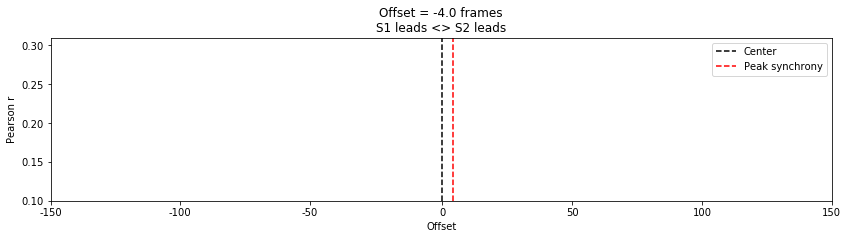

(-4.0, 0.8744043609820713)

In [228]:
d1 = df["temperature_sensorB"].astype(int)
d2 = df['temperature_sensorA'].astype(int)
offset, highest_corr = plot_offset_graph(d1, d2)
offset, highest_corr

In [234]:
data2 = pd.read_csv("simulated_temperature_dataset.csv")

In [235]:
simulated_temperature2 = data2["simulated_temperature"]

## temperature_sensorB vs temperature_sensorC 

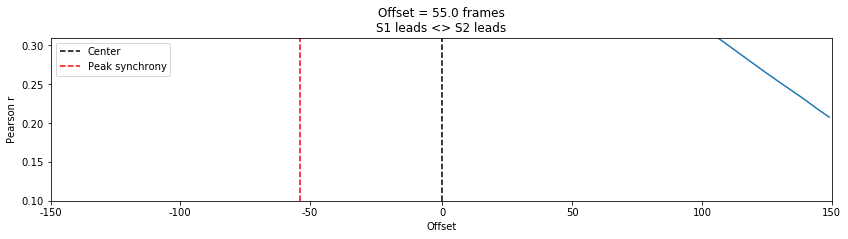

(55.0, 0.61595138781580461)

In [232]:
d1 = df['temperature_sensorB'].astype(float)
d2 = df['temperature_sensorC'].astype(float)
plot_offset_graph(d1, d2)

## temperature from the sensor and the attacker device showed a large offset 

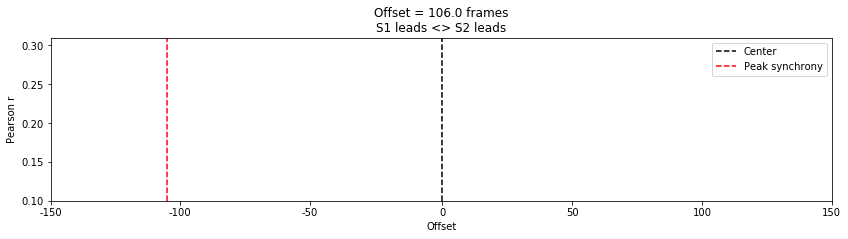

(106.0, 0.041424987271992356)

In [231]:
plot_offset_graph(pd.Series(simulated_temp), df['temperature_sensorA'].astype(int))

## Temprature and acceleration data from sensor A showed a small lag

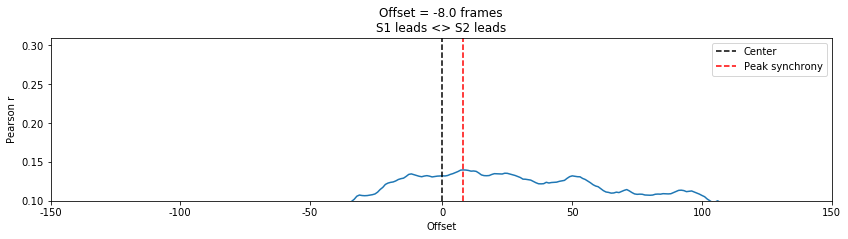

(-8.0, 0.13975762221987309)

In [230]:
d1 = df['temperature_sensorA'].astype(float)
d2 = df['acceleration_sensorA'].map({"active" : 1, "inactive" : 0})
plot_offset_graph(d1, d2)


## Acceleration A vs motion B  still showed a small lag 

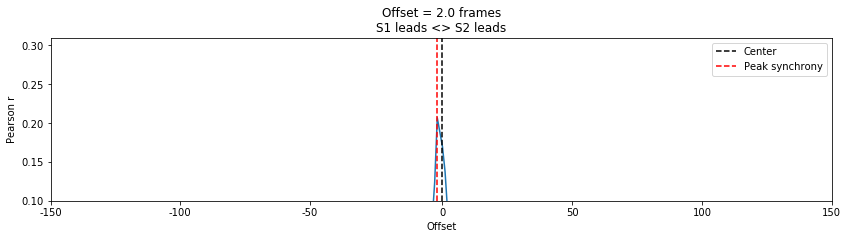

(2.0, 0.20690888593914136)

In [229]:
d1 = df['acceleration_sensorA'].map({"active" : 1, "inactive" : 0})
d2 = df['motion_sensorB'].map({"active" : 1, "inactive" : 0})
plot_offset_graph(d1, d2)

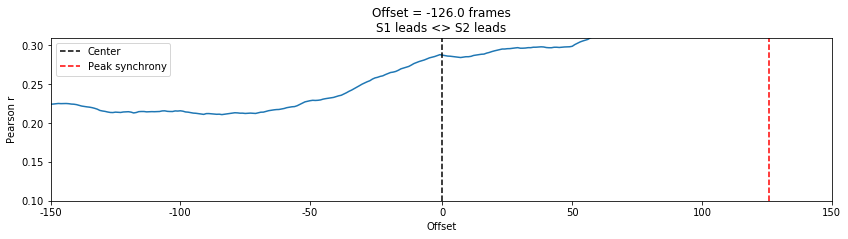

(-126.0, 0.3182790330955817)

In [238]:
d1 = df['temperature_sensorA'].astype(float)
d2 = simulated_temperature2.astype(int)
plot_offset_graph(d1, d2)